# Libraries

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as ipy
from random import sample
import shap
shap.initjs()
%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Data

In [3]:
solution_path = 'solution_4_tuning_800'

application = pd.read_csv('/mnt/ml-team/minerva/open-solutions/home-credit/files/unzipped_data/application_train.csv')
oof_train = pd.read_csv('/mnt/ml-team/minerva/open-solutions/home-credit/kuba/experiments/{}/lightGBM_out_of_fold_train_predictions.csv'.format(solution_path))
model = joblib.load('/mnt/ml-team/minerva/open-solutions/home-credit/kuba/experiments/{}/transformers//light_gbm_fold_0'.format(solution_path))
features = joblib.load('/mnt/ml-team/minerva/open-solutions/home-credit/kuba/experiments/{}/outputs/feature_joiner_valid_fold_0'.format(solution_path))
description = pd.read_csv('/mnt/ml-team/minerva/open-solutions/home-credit/data/HomeCredit_columns_description.csv', encoding='latin1')

In [4]:
index_list = oof_train[oof_train.fold_id==0]['SK_ID_CURR']

In [5]:
oof_train_0 = oof_train[oof_train['SK_ID_CURR'].isin(index_list)]
application_0 = application[application['SK_ID_CURR'].isin(index_list)]

In [6]:
oof_train_0 = oof_train[oof_train['SK_ID_CURR'].isin(index_list)]
application_0 = application[application['SK_ID_CURR'].isin(index_list)]
features_df = features['features']

In [7]:
exploration_data = oof_train_0.copy()
exploration_data['target'] = application_0['TARGET'].values
exploration_data['diff_abs'] = np.abs(exploration_data['lightGBM_prediction'] - exploration_data['target'])
exploration_data['diff'] = exploration_data['lightGBM_prediction'] - exploration_data['target']

# Features description

In [8]:
description.head()
@ipy.interact(
            cols = ipy.SelectMultiple(
                options=description.Row,
                rows=10,
                value=(description.Row[0],),
                description='Features',
                layout=ipy.Layout(width='90%')
            )
)
def func(cols):
    for i, col in enumerate(cols):
        display('{} --- {}'.format(col, description[description.Row==col]['Description'].values[0]))

interactive(children=(SelectMultiple(description='Features', index=(0,), layout=Layout(width='90%'), options=('SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_CURR', 'SK_BUREAU_ID', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY', 'SK_BUREAU_ID', 'MONTHS_BALANCE', 'STATUS', 'SK_ID_PREV ', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF', 'SK_ID_PREV ', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF', 'SK_ID_PREV ', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NFLAG_MICRO_CASH

# Shap - Feature impact on a model

https://github.com/slundberg/shap 

https://arxiv.org/pdf/1802.03888.pdf 

http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf 

Our first step is to compute SHAP values for each example in our dataset. $base\_value$ is mean of our predictions and in our dataset equals $0.04942$ and will be flagged on plots below. The Shap value tells us how certain feature moved our prediction on ceratin example from expected value of all predictions.
$$ output\_value (x) = base\_value + \sum\limits_{i=1}^{M} \phi_{i}z_{i}(x) $$,

where $ z_i(x) \in \{0, 1\}$ describes if $i$-th feature-value(e.g. SEX='Male') occurs at example $x$ and $\phi_i$ is SHAP value of given feature.

In [9]:
shap_values = shap.TreeExplainer(model).shap_values(features_df)
global_shap_vals = np.abs(shap_values).mean(0)[:-1]
inds = np.argsort(global_shap_vals)

In [10]:
display(shap.force_plot(shap_values[0,:], features_df.iloc[0,:], link="logit"))
display(shap.force_plot(shap_values[1,:], features_df.iloc[1,:], link="logit"))

/mnt/ml-team/homes/jakub.czakon/.env/cpu_py3/lib/python3.5/site-packages/shap/plots.py:631: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  features = features.as_matrix()


# Feature importance

In [11]:
@ipy.interact(cols=ipy.IntRangeSlider(
                value=(1, 20),
                min=1,
                max=features_df.shape[1],
                description='Features:',
                continuous_update=False,
                layout=ipy.Layout(width='90%', height='30px')
            ))
def func(cols):
    min_index = -cols[1]
    max_index = -cols[0]
    y_pos = np.arange(features_df.shape[1])
    plt.title("Feature importance: mean(|SHAP|)")
    plt.barh(y_pos[min_index:max_index], global_shap_vals[inds][min_index:max_index], color="#1E88E5")
    plt.yticks(y_pos[min_index:max_index], features_df.columns[inds][min_index:max_index])
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("mean SHAP value magnitude (change in log odds)")
    plt.gcf().set_size_inches(11, (cols[1]-cols[0])//2)
    plt.show()

interactive(children=(IntRangeSlider(value=(1, 20), continuous_update=False, description='Features:', layout=Layout(height='30px', width='90%'), max=478, min=1), Output()), _dom_classes=('widget-interact',))

/mnt/ml-team/homes/jakub.czakon/.env/cpu_py3/lib/python3.5/site-packages/shap/plots.py:297: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  features = features.as_matrix()


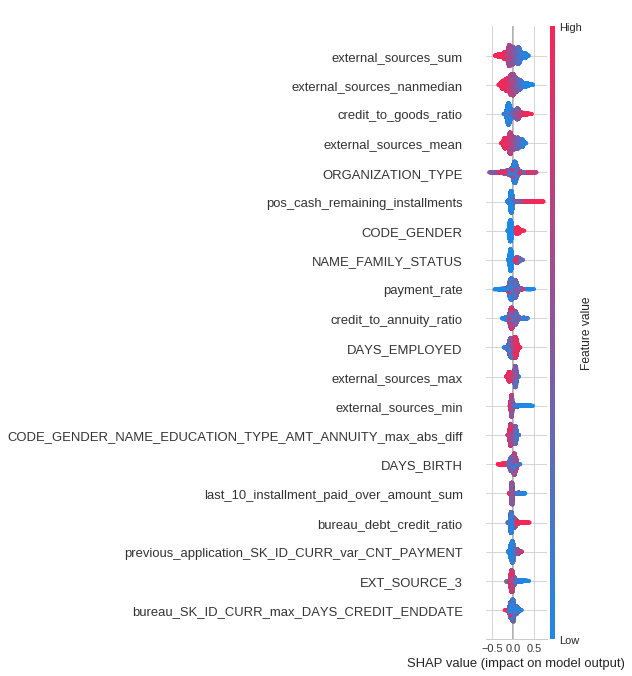

None

In [20]:
plt.figure(figsize=(20,10))
display(shap.summary_plot(shap_values, features_df, max_display=20))

In [14]:
@ipy.interact(
            cols = ipy.SelectMultiple(
                options=list(reversed(features_df.columns[inds])),
                rows=10,
                value=(list(reversed(features_df.columns[inds]))[0], ),
                description='Corr Columns',
                layout=ipy.Layout(width='90%')
            ),
            num_samples=ipy.IntSlider(
                value=250,
                min=100,
                max=1000,
                step = 50,
                continuous_update=False,
                description='Samples:',
                layout=ipy.Layout(width='90%', height='30px')
            )
)
def func(cols, num_samples):
    smp = sample(range(len(shap_values)), num_samples)
    for col in cols:
        display(shap.dependence_plot(col, shap_values[smp], features_df.loc[smp,:]))

interactive(children=(SelectMultiple(description='Corr Columns', index=(0,), layout=Layout(width='90%'), options=('external_sources_sum', 'external_sources_nanmedian', 'credit_to_goods_ratio', 'external_sources_mean', 'ORGANIZATION_TYPE', 'pos_cash_remaining_installments', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'payment_rate', 'credit_to_annuity_ratio', 'DAYS_EMPLOYED', 'external_sources_max', 'external_sources_min', 'CODE_GENDER_NAME_EDUCATION_TYPE_AMT_ANNUITY_max_abs_diff', 'DAYS_BIRTH', 'last_10_installment_paid_over_amount_sum', 'bureau_debt_credit_ratio', 'previous_application_SK_ID_CURR_var_CNT_PAYMENT', 'EXT_SOURCE_3', 'bureau_SK_ID_CURR_max_DAYS_CREDIT_ENDDATE', 'OCCUPATION_TYPE', 'AMT_ANNUITY', 'CODE_GENDER_NAME_EDUCATION_TYPE_EXT_SOURCE_2_mean_diff', 'bureau_SK_ID_CURR_max_DAYS_CREDIT', 'FLAG_WORK_PHONE', 'annuity_income_percentage', 'previous_application_SK_ID_CURR_mean_AMT_ANNUITY', 'HOUR_APPR_PROCESS_START', 'bureau_credit_active_binary', 'REGION_POPULATION_RELATIVE', 'FLAG_DOCUMENT_3', 'OCCUPATION_TYPE_EXT_SOURCE_3_mean_diff', 'installments_payments_SK_ID_CURR_sum_AMT_PAYMENT', 'NAME_EDUCATION_TYPE', 'OWN_CAR_AGE', 'last_5_installment_paid_over_amount_sum', 'last_loan_installment_paid_over_amount_sum', 'DEF_30_CNT_SOCIAL_CIRCLE', 'previous_application_SK_ID_CURR_mean_CNT_PAYMENT', 'installments_payments_SK_ID_CURR_max_DAYS_ENTRY_PAYMENT', 'bureau_SK_ID_CURR_var_AMT_CREDIT_SUM_LIMIT', 'installments_payments_SK_ID_CURR_min_AMT_INSTALMENT', 'bureau_SK_ID_CURR_min_AMT_CREDIT_SUM', 'CODE_GENDER_REG_CITY_NOT_WORK_CITY_AMT_ANNUITY_mean_diff', 'EXT_SOURCE_1', 'previous_application_prev_was_refused', 'NAME_INCOME_TYPE', 'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH', 'bureau_SK_ID_CURR_var_AMT_CREDIT_SUM_DEBT', 'last_10_installment_paid_late_in_days_sum', 'previous_application_SK_ID_CURR_sum_CNT_PAYMENT', 'installments_payments_SK_ID_CURR_sum_AMT_INSTALMENT', 'CODE_GENDER_REG_CITY_NOT_WORK_CITY_DAYS_ID_PUBLISH_mean_diff', 'days_employed_percentage', 'external_sources_weighted', 'previous_application_SK_ID_CURR_min_AMT_ANNUITY', 'previous_application_SK_ID_CURR_sum_AMT_DOWN_PAYMENT', 'last_5_installment_paid_late_in_days_sum', '10_period_trend_installment_paid_late_in_days', 'last_loan_installment_paid_late_in_days_sum', 'CODE_GENDER_NAME_EDUCATION_TYPE_AMT_CREDIT_max_diff', 'POS_CASH_balance_SK_ID_CURR_max_MONTHS_BALANCE', 'installments_payments_SK_ID_CURR_var_AMT_PAYMENT', 'POS_CASH_balance_SK_ID_CURR_var_MONTHS_BALANCE', 'last_50_installment_paid_over_amount_sum', 'car_to_birth_ratio', 'previous_application_SK_ID_CURR_min_CNT_PAYMENT', 'CODE_GENDER_NAME_EDUCATION_TYPE_AMT_ANNUITY_max_diff', 'CODE_GENDER_ORGANIZATION_TYPE_AMT_ANNUITY_mean_diff', 'bureau_SK_ID_CURR_mean_AMT_CREDIT_SUM_DEBT', 'bureau_SK_ID_CURR_max_AMT_CREDIT_SUM', 'WALLSMATERIAL_MODE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'previous_application_SK_ID_CURR_min_AMT_GOODS_PRICE', 'installments_payments_SK_ID_CURR_var_DAYS_INSTALMENT', 'installments_payments_SK_ID_CURR_mean_AMT_PAYMENT', 'bureau_SK_ID_CURR_mean_AMT_CREDIT_MAX_OVERDUE', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_NAME_EDUCATION_TYPE_AMT_CREDIT_max_abs_diff', 'WEEKDAY_APPR_PROCESS_START', 'EXT_SOURCE_2', 'NAME_EDUCATION_TYPE_OCCUPATION_TYPE_EXT_SOURCE_3_mean_diff', '50_period_trend_installment_paid_late_in_days', 'installments_payments_SK_ID_CURR_var_DAYS_ENTRY_PAYMENT', 'bureau_SK_ID_CURR_mean_DAYS_CREDIT', 'DAYS_REGISTRATION', 'installments_payments_SK_ID_CURR_max_AMT_INSTALMENT', 'car_to_employ_ratio', 'CODE_GENDER_ORGANIZATION_TYPE_EXT_SOURCE_1_mean_diff', 'bureau_SK_ID_CURR_sum_AMT_CREDIT_MAX_OVERDUE', 'CODE_GENDER_NAME_EDUCATION_TYPE_OWN_CAR_AGE_max_diff', 'bureau_SK_ID_CURR_var_AMT_CREDIT_MAX_OVERDUE', 'previous_application_SK_ID_CURR_max_AMT_ANNUITY', 'previous_application_term_of_last_4_credits_mean', 'bureau_SK_ID_CURR_max_AMT_CREDIT_MAX_OVERDUE', 'installments_payments_SK_ID_CURR_max_DAYS_INSTALMENT', 'installments_payments_SK_ID_CURR_min_AMT_PAYMENT', 'installments_payments_SK_ID_CURR_var_AMT_INSTALMENT

# Predictions

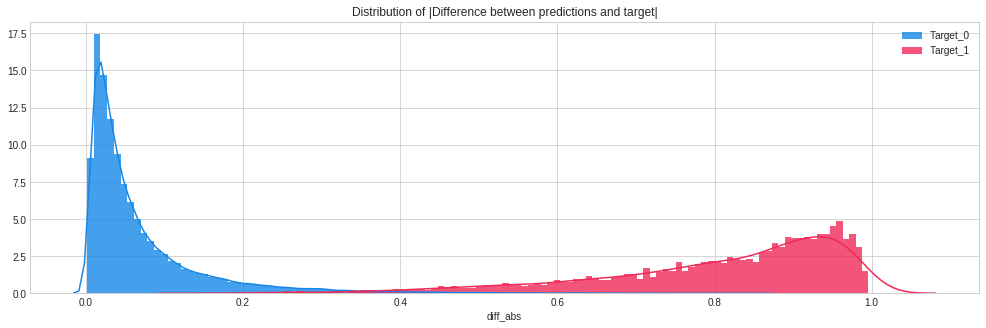

In [15]:
plt.figure(figsize=(17,5))

plt.title("Distribution of |Difference between predictions and target|")
sns.distplot(exploration_data[exploration_data['target']==0]['diff_abs'], 
             label='Target_0', 
             color='#1587E8',
             hist_kws={'alpha': 0.8},
             bins=100);
sns.distplot(exploration_data[exploration_data['target']==1]['diff_abs'], 
             label='Target_1',
             color='#F02958',
             hist_kws={'alpha': 0.8},
             bins=100);
plt.legend()
plt.show()

In [16]:
feature_analysis = features_df.copy()

In [17]:
feature_analysis['INDEX'] = index_list
feature_analysis['TARGET'] = exploration_data['target']
feature_analysis['DIFF'] = exploration_data['diff']
feature_analysis['DIFF_ABS'] = exploration_data['diff_abs']

In [18]:
@ipy.interact(
            cols = ipy.SelectMultiple(
                options=list(reversed(features_df.columns[inds])),
                rows=10,
                value=(list(reversed(features_df.columns[inds]))[0], ),
                description='Corr Columns',
                layout=ipy.Layout(width='90%')
            ),
            num_samples=ipy.IntSlider(
                value=250,
                min=100,
                max=1000,
                step = 50,
                continuous_update=False,
                description='Samples:',
                layout=ipy.Layout(width='90%', height='30px')
            )
)
def func(cols, num_samples):
    for col in cols:
        fig = plt.figure(figsize=(16, 8));
        target_1 = feature_analysis[feature_analysis['TARGET']==1]
        target_0 = feature_analysis[feature_analysis['TARGET']==0]
        smp_1 = sample(range(len(target_1)), min(num_samples, len(target_1)))
        smp_0 = sample(range(len(target_0)), min(num_samples, len(target_0)))
        df = pd.concat([target_1.iloc[smp_1,:], target_0.iloc[smp_0,:]], axis=0)
        display(sns.swarmplot(x='TARGET', y=col, data=df, palette=['#1587E8', '#F02958'],))
        plt.show()

interactive(children=(SelectMultiple(description='Corr Columns', index=(0,), layout=Layout(width='90%'), options=('external_sources_sum', 'external_sources_nanmedian', 'credit_to_goods_ratio', 'external_sources_mean', 'ORGANIZATION_TYPE', 'pos_cash_remaining_installments', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'payment_rate', 'credit_to_annuity_ratio', 'DAYS_EMPLOYED', 'external_sources_max', 'external_sources_min', 'CODE_GENDER_NAME_EDUCATION_TYPE_AMT_ANNUITY_max_abs_diff', 'DAYS_BIRTH', 'last_10_installment_paid_over_amount_sum', 'bureau_debt_credit_ratio', 'previous_application_SK_ID_CURR_var_CNT_PAYMENT', 'EXT_SOURCE_3', 'bureau_SK_ID_CURR_max_DAYS_CREDIT_ENDDATE', 'OCCUPATION_TYPE', 'AMT_ANNUITY', 'CODE_GENDER_NAME_EDUCATION_TYPE_EXT_SOURCE_2_mean_diff', 'bureau_SK_ID_CURR_max_DAYS_CREDIT', 'FLAG_WORK_PHONE', 'annuity_income_percentage', 'previous_application_SK_ID_CURR_mean_AMT_ANNUITY', 'HOUR_APPR_PROCESS_START', 'bureau_credit_active_binary', 'REGION_POPULATION_RELATIVE', 'FLAG_DOCUMENT_3', 'OCCUPATION_TYPE_EXT_SOURCE_3_mean_diff', 'installments_payments_SK_ID_CURR_sum_AMT_PAYMENT', 'NAME_EDUCATION_TYPE', 'OWN_CAR_AGE', 'last_5_installment_paid_over_amount_sum', 'last_loan_installment_paid_over_amount_sum', 'DEF_30_CNT_SOCIAL_CIRCLE', 'previous_application_SK_ID_CURR_mean_CNT_PAYMENT', 'installments_payments_SK_ID_CURR_max_DAYS_ENTRY_PAYMENT', 'bureau_SK_ID_CURR_var_AMT_CREDIT_SUM_LIMIT', 'installments_payments_SK_ID_CURR_min_AMT_INSTALMENT', 'bureau_SK_ID_CURR_min_AMT_CREDIT_SUM', 'CODE_GENDER_REG_CITY_NOT_WORK_CITY_AMT_ANNUITY_mean_diff', 'EXT_SOURCE_1', 'previous_application_prev_was_refused', 'NAME_INCOME_TYPE', 'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH', 'bureau_SK_ID_CURR_var_AMT_CREDIT_SUM_DEBT', 'last_10_installment_paid_late_in_days_sum', 'previous_application_SK_ID_CURR_sum_CNT_PAYMENT', 'installments_payments_SK_ID_CURR_sum_AMT_INSTALMENT', 'CODE_GENDER_REG_CITY_NOT_WORK_CITY_DAYS_ID_PUBLISH_mean_diff', 'days_employed_percentage', 'external_sources_weighted', 'previous_application_SK_ID_CURR_min_AMT_ANNUITY', 'previous_application_SK_ID_CURR_sum_AMT_DOWN_PAYMENT', 'last_5_installment_paid_late_in_days_sum', '10_period_trend_installment_paid_late_in_days', 'last_loan_installment_paid_late_in_days_sum', 'CODE_GENDER_NAME_EDUCATION_TYPE_AMT_CREDIT_max_diff', 'POS_CASH_balance_SK_ID_CURR_max_MONTHS_BALANCE', 'installments_payments_SK_ID_CURR_var_AMT_PAYMENT', 'POS_CASH_balance_SK_ID_CURR_var_MONTHS_BALANCE', 'last_50_installment_paid_over_amount_sum', 'car_to_birth_ratio', 'previous_application_SK_ID_CURR_min_CNT_PAYMENT', 'CODE_GENDER_NAME_EDUCATION_TYPE_AMT_ANNUITY_max_diff', 'CODE_GENDER_ORGANIZATION_TYPE_AMT_ANNUITY_mean_diff', 'bureau_SK_ID_CURR_mean_AMT_CREDIT_SUM_DEBT', 'bureau_SK_ID_CURR_max_AMT_CREDIT_SUM', 'WALLSMATERIAL_MODE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'previous_application_SK_ID_CURR_min_AMT_GOODS_PRICE', 'installments_payments_SK_ID_CURR_var_DAYS_INSTALMENT', 'installments_payments_SK_ID_CURR_mean_AMT_PAYMENT', 'bureau_SK_ID_CURR_mean_AMT_CREDIT_MAX_OVERDUE', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_NAME_EDUCATION_TYPE_AMT_CREDIT_max_abs_diff', 'WEEKDAY_APPR_PROCESS_START', 'EXT_SOURCE_2', 'NAME_EDUCATION_TYPE_OCCUPATION_TYPE_EXT_SOURCE_3_mean_diff', '50_period_trend_installment_paid_late_in_days', 'installments_payments_SK_ID_CURR_var_DAYS_ENTRY_PAYMENT', 'bureau_SK_ID_CURR_mean_DAYS_CREDIT', 'DAYS_REGISTRATION', 'installments_payments_SK_ID_CURR_max_AMT_INSTALMENT', 'car_to_employ_ratio', 'CODE_GENDER_ORGANIZATION_TYPE_EXT_SOURCE_1_mean_diff', 'bureau_SK_ID_CURR_sum_AMT_CREDIT_MAX_OVERDUE', 'CODE_GENDER_NAME_EDUCATION_TYPE_OWN_CAR_AGE_max_diff', 'bureau_SK_ID_CURR_var_AMT_CREDIT_MAX_OVERDUE', 'previous_application_SK_ID_CURR_max_AMT_ANNUITY', 'previous_application_term_of_last_4_credits_mean', 'bureau_SK_ID_CURR_max_AMT_CREDIT_MAX_OVERDUE', 'installments_payments_SK_ID_CURR_max_DAYS_INSTALMENT', 'installments_payments_SK_ID_CURR_min_AMT_PAYMENT', 'installments_payments_SK_ID_CURR_var_AMT_INSTALMENT

In [19]:
def get_between(df, col, interval):
    return df[(interval[0] <= df[col]) & (df[col] <= interval[1])]

def col_without_nan(df, col):
    val = df[col]
    return val[~np.isnan(val)]

@ipy.interact(
            diff_1=ipy.FloatRangeSlider(
                value=(0.5, 1.0),
                min=0.0,
                max=1.0,
                step=0.01,
                description='Difference_1:',
                continuous_update=False,
                layout=ipy.Layout(width='90%', height='30px')
            ),  
            diff_2=ipy.FloatRangeSlider(
                value=(0.0, 0.5),
                min=0.0,
                max=1.0,
                step=0.01,
                description='Difference_2:',
                continuous_update=False,
                layout=ipy.Layout(width='90%', height='30px')
            ),
            cols = ipy.SelectMultiple(
                options=list(reversed(features_df.columns[inds])),
                rows=10,
                value=(list(reversed(features_df.columns[inds]))[0], ),
                description='Columns',
                layout=ipy.Layout(width='90%')
            ))
def func(diff_1, diff_2, cols):
    for col in cols:
        vals_1 = col_without_nan(get_between(feature_analysis, 'DIFF_ABS', diff_1) , col)
        vals_2 = col_without_nan(get_between(feature_analysis, 'DIFF_ABS', diff_2) , col)
        display(sns.distplot(vals_1, label='Difference_1', color='#F02958', hist_kws={'alpha': 0.7}, bins=min(100, len(vals_1))))
        display(sns.distplot(vals_2, label='Difference_2', color='#1587E8', hist_kws={'alpha': 0.7}, bins=min(100, len(vals_2))))
        plt.legend()
        plt.show()

interactive(children=(FloatRangeSlider(value=(0.5, 1.0), continuous_update=False, description='Difference_1:', layout=Layout(height='30px', width='90%'), max=1.0, step=0.01), FloatRangeSlider(value=(0.0, 0.5), continuous_update=False, description='Difference_2:', layout=Layout(height='30px', width='90%'), max=1.0, step=0.01), SelectMultiple(description='Columns', index=(0,), layout=Layout(width='90%'), options=('external_sources_sum', 'external_sources_nanmedian', 'credit_to_goods_ratio', 'external_sources_mean', 'ORGANIZATION_TYPE', 'pos_cash_remaining_installments', 'CODE_GENDER', 'NAME_FAMILY_STATUS', 'payment_rate', 'credit_to_annuity_ratio', 'DAYS_EMPLOYED', 'external_sources_max', 'external_sources_min', 'CODE_GENDER_NAME_EDUCATION_TYPE_AMT_ANNUITY_max_abs_diff', 'DAYS_BIRTH', 'last_10_installment_paid_over_amount_sum', 'bureau_debt_credit_ratio', 'previous_application_SK_ID_CURR_var_CNT_PAYMENT', 'EXT_SOURCE_3', 'bureau_SK_ID_CURR_max_DAYS_CREDIT_ENDDATE', 'OCCUPATION_TYPE', 'AMT_ANNUITY', 'CODE_GENDER_NAME_EDUCATION_TYPE_EXT_SOURCE_2_mean_diff', 'bureau_SK_ID_CURR_max_DAYS_CREDIT', 'FLAG_WORK_PHONE', 'annuity_income_percentage', 'previous_application_SK_ID_CURR_mean_AMT_ANNUITY', 'HOUR_APPR_PROCESS_START', 'bureau_credit_active_binary', 'REGION_POPULATION_RELATIVE', 'FLAG_DOCUMENT_3', 'OCCUPATION_TYPE_EXT_SOURCE_3_mean_diff', 'installments_payments_SK_ID_CURR_sum_AMT_PAYMENT', 'NAME_EDUCATION_TYPE', 'OWN_CAR_AGE', 'last_5_installment_paid_over_amount_sum', 'last_loan_installment_paid_over_amount_sum', 'DEF_30_CNT_SOCIAL_CIRCLE', 'previous_application_SK_ID_CURR_mean_CNT_PAYMENT', 'installments_payments_SK_ID_CURR_max_DAYS_ENTRY_PAYMENT', 'bureau_SK_ID_CURR_var_AMT_CREDIT_SUM_LIMIT', 'installments_payments_SK_ID_CURR_min_AMT_INSTALMENT', 'bureau_SK_ID_CURR_min_AMT_CREDIT_SUM', 'CODE_GENDER_REG_CITY_NOT_WORK_CITY_AMT_ANNUITY_mean_diff', 'EXT_SOURCE_1', 'previous_application_prev_was_refused', 'NAME_INCOME_TYPE', 'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH', 'bureau_SK_ID_CURR_var_AMT_CREDIT_SUM_DEBT', 'last_10_installment_paid_late_in_days_sum', 'previous_application_SK_ID_CURR_sum_CNT_PAYMENT', 'installments_payments_SK_ID_CURR_sum_AMT_INSTALMENT', 'CODE_GENDER_REG_CITY_NOT_WORK_CITY_DAYS_ID_PUBLISH_mean_diff', 'days_employed_percentage', 'external_sources_weighted', 'previous_application_SK_ID_CURR_min_AMT_ANNUITY', 'previous_application_SK_ID_CURR_sum_AMT_DOWN_PAYMENT', 'last_5_installment_paid_late_in_days_sum', '10_period_trend_installment_paid_late_in_days', 'last_loan_installment_paid_late_in_days_sum', 'CODE_GENDER_NAME_EDUCATION_TYPE_AMT_CREDIT_max_diff', 'POS_CASH_balance_SK_ID_CURR_max_MONTHS_BALANCE', 'installments_payments_SK_ID_CURR_var_AMT_PAYMENT', 'POS_CASH_balance_SK_ID_CURR_var_MONTHS_BALANCE', 'last_50_installment_paid_over_amount_sum', 'car_to_birth_ratio', 'previous_application_SK_ID_CURR_min_CNT_PAYMENT', 'CODE_GENDER_NAME_EDUCATION_TYPE_AMT_ANNUITY_max_diff', 'CODE_GENDER_ORGANIZATION_TYPE_AMT_ANNUITY_mean_diff', 'bureau_SK_ID_CURR_mean_AMT_CREDIT_SUM_DEBT', 'bureau_SK_ID_CURR_max_AMT_CREDIT_SUM', 'WALLSMATERIAL_MODE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'previous_application_SK_ID_CURR_min_AMT_GOODS_PRICE', 'installments_payments_SK_ID_CURR_var_DAYS_INSTALMENT', 'installments_payments_SK_ID_CURR_mean_AMT_PAYMENT', 'bureau_SK_ID_CURR_mean_AMT_CREDIT_MAX_OVERDUE', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_NAME_EDUCATION_TYPE_AMT_CREDIT_max_abs_diff', 'WEEKDAY_APPR_PROCESS_START', 'EXT_SOURCE_2', 'NAME_EDUCATION_TYPE_OCCUPATION_TYPE_EXT_SOURCE_3_mean_diff', '50_period_trend_installment_paid_late_in_days', 'installments_payments_SK_ID_CURR_var_DAYS_ENTRY_PAYMENT', 'bureau_SK_ID_CURR_mean_DAYS_CREDIT', 'DAYS_REGISTRATION', 'installments_payments_SK_ID_CURR_max_AMT_INSTALMENT', 'car_to_employ_ratio', 'CODE_GENDER_ORGANIZATION_TYPE_EXT_SOURCE_1_mean_diff', 'bureau_SK_ID_CURR_sum_AMT_CREDIT_MAX_OVERDUE', 'CODE_GENDER_NAME_EDUCATION_TYPE_OWN_CAR_AGE_max_diff', 'bureau_SK_ID_CURR_var_AMT_CREDIT_MAX_OVERDUE', 'previous_